In [1]:
from tunable_agents import utility, main
import utils
import gin
import numpy as np
import tensorflow as tf
from tf_agents.environments import tf_py_environment
from tf_agents.policies import py_tf_eager_policy
from tunable_agents.environments.gathering_env import gathering_env
import matplotlib.pyplot as plt

%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

ModuleNotFoundError: No module named 'tunable_agents'

In [2]:
absolute_path = "C:/Users/maler/Federico/Università/Master/Tesi"
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"
root_dir = absolute_path + "/experiments_results"
experiment_name = "gathering_longer_epochs"
policy_dir = os.path.join(root_dir, experiment_name, "policy")

gin_files = [configs_dir + "envs/gathering_replication_env.gin"]
gin_files = [configs_dir + "envs/gathering_fixed_env.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

ERROR:root:Path not found: envs/gathering_replication_env.gin


In [3]:
env = gathering_env.GatheringWrapper(utility_repr=np.array([1,5,3,4,5,6], dtype=np.float32))
env = gathering_env.GatheringWrapper()
#env = gathering_env.GatheringWrapper(cumulative_rewards_flag=True)

In [4]:
time_step = env.reset()
action = None
print(time_step.observation['utility_representation'])

[-0.025 -0.125 -0.375  0.5    0.     0.   ]


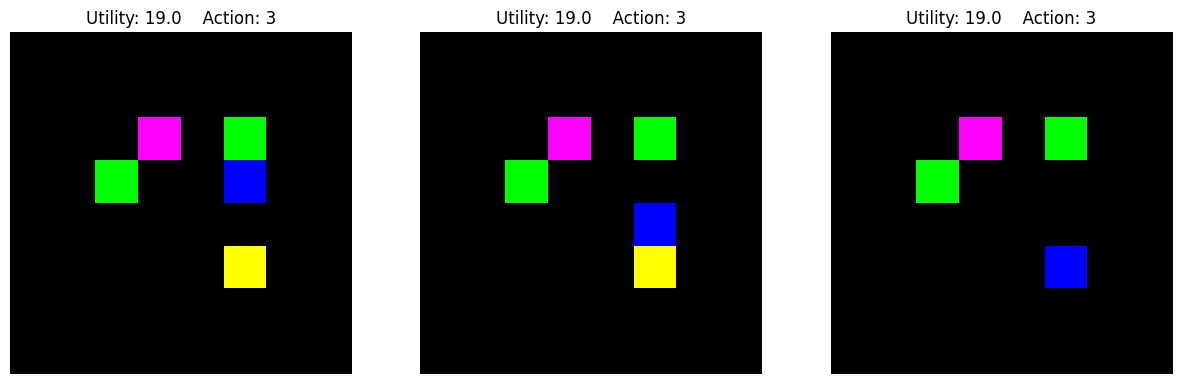

END EPISODE


In [44]:
plt.figure(figsize=(15,7), dpi=100)
for i in range(1, 4):
    plt.subplot(1,3,i)
    image = time_step.observation['state_obs'][:, :, 3*(i-1):3*i]
    plt.imshow(image)
    plt.title('Utility: {}    Action: {}'.format(time_step.reward, action))
    plt.axis('off')
plt.show()
if time_step.is_last():
    print('END EPISODE')

In [43]:
# 0: Do nothing
# 1: Left
# 2: Right
# 3: Down
# 4: Up
action = 3


time_step = env.step(action)

In [45]:
print(env._prev_step_utility)

89.0
